BERT-YN (Answer Only)

Importing Libraries

In [1]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 4.1 MB/s 


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import keras


Read Train Data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_train.xlsx')
df.head(5)

,Unnamed: 0,id,context,question-X,canquestion-X,answer-Y,judgements,goldstandard1,goldstandard2
0,1307,1307,X and Y are childhood neighbours who unexpecte...,Will you be going to the big New Year's Eve pa...,I will be going to the big New Year 's Eve par...,I have not made plans yet.,"Probably no#In the middle, neither yes nor no#...","In the middle, neither yes nor no","In the middle, neither yes nor no"
1,28437,28437,X wants to know what activities Y likes to do ...,Do you enjoy water sports?,I enjoy water sports .,I surf.,Probably yes / sometimes yes#Yes#Probably yes ...,Yes,Yes
2,18227,18227,X wants to know about Y's music preferences.,Have you heard Mozart?,I have heard Mozart .,Of course,Yes#Yes#Yes#Yes#Yes,Yes,Yes
3,8659,8659,X wants to know about Y's music preferences.,Have you ever listened to Papa Roach?,I have ever listened to Papa Roach .,I have not heard of Papa Roach,No#No#No#No#No,No,No
4,20999,20999,X and Y are childhood neighbours who unexpecte...,Have you been well?,I have been well .,I was sick last week with a cold.,Probably no#No#No#No#No,No,No


Data Preprocessing

In [4]:
df['goldstandard2'] = df['goldstandard2'].replace(np.nan, 'N/A')
df['goldstandard1'] = df['goldstandard1'].replace(np.nan, 'N/A')
df['goldstandard2'] = df['goldstandard2'].astype(str)
df['goldstandard1'] = df['goldstandard1'].astype(str)

In [5]:
df['goldstandard1'].value_counts()

Yes                                              8671
No                                               6446
N/A                                              1692
Yes, subject to some conditions                  1598
Probably yes / sometimes yes                      742
Probably no                                       706
In the middle, neither yes nor no                 387
Other                                             287
I am not sure how X will interpret Y’s answer      31
Name: goldstandard1, dtype: int64

In [6]:
df = df[['answer-Y','goldstandard2']].copy()

In [7]:
df

,answer-Y,goldstandard2
0,I have not made plans yet.,"In the middle, neither yes nor no"
1,I surf.,Yes
2,Of course,Yes
3,I have not heard of Papa Roach,No
4,I was sick last week with a cold.,No
...,...,...
20555,I can never get through them.,No
20556,I no longer listen to the radio with Spotify a...,No
20557,I didn't read any of the Game of Thrones.,No
20558,"Once, long ago.",Yes


In [8]:
df['goldstandard2'].value_counts()


Yes                                  9940
No                                   7674
Yes, subject to some conditions      1598
In the middle, neither yes nor no     581
N/A                                   480
Other                                 287
Name: goldstandard2, dtype: int64

In [9]:
# Multi Class Classification 
y = pd.get_dummies(df.goldstandard2, prefix='goldstandard2')
y

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


In [10]:
df.head(10)

,answer-Y,goldstandard2
0,I have not made plans yet.,"In the middle, neither yes nor no"
1,I surf.,Yes
2,Of course,Yes
3,I have not heard of Papa Roach,No
4,I was sick last week with a cold.,No
5,Especially when it's European.,Yes
6,"My trip was nice, I enjoyed the view.",Yes
7,I hardly have time to watch tv,No
8,I prefer to watch than to play.,Yes
9,I love Chinese food.,Yes


Load BERT Preprocessor and Encoder

In [11]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable = True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable = True)

In [12]:
# # Get Sentence embedding using BERT
# def get_sentence_embeding(sentences):
#     preprocessed_text = bert_preprocess(sentences)
#     return bert_encoder(preprocessed_text)['pooled_output']

# # Sample Check -> 6 sentences, so expect 6x768 embedding matrix for this one
# e = get_sentence_embeding([
#     "banana", 
#     "grapes",
#     "mango",
#     "jeff bezos",
#     "elon musk",
#     "bill gates"
# ]
# )
# e

Design Architecture

In [13]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [14]:
text_input

<KerasTensor: shape=(None,) dtype=string (created by layer 'text')>

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [16]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
optimizer = tf.keras.optimizers.Adam(0.00002)
optimizer.learning_rate.assign(0.00002)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

Training

In [17]:
model.fit(df['answer-Y'], y, epochs=3, batch_size = 32)

Epoch 1/3
643/643 [==============================] - 339s 508ms/step - loss: 0.7587 - accuracy: 0.9148 - precision: 0.7712 - recall: 0.6949
Epoch 2/3
643/643 [==============================] - 326s 507ms/step - loss: 0.5861 - accuracy: 0.9374 - precision: 0.8311 - recall: 0.7837
Epoch 3/3
643/643 [==============================] - 326s 507ms/step - loss: 0.4644 - accuracy: 0.9511 - precision: 0.8708 - recall: 0.8297


Evaluating Validation Data

In [18]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_validate.xlsx')
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard1'] = df_valid['goldstandard1'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['goldstandard1'] = df_valid['goldstandard1'].astype(str)
df_valid = df_valid[['answer-Y','goldstandard2']].copy()
df_valid.head(5)

# Multi Class Classification 
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='goldstandard2')
y_valid

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,1,0,0,0
6851,0,0,1,0,0,0
6852,0,0,1,0,0,0


In [19]:
model.evaluate(df_valid['answer-Y'], y_valid)

215/215 [==============================] - 43s 195ms/step - loss: 0.6763 - accuracy: 0.9296 - precision: 0.8001 - recall: 0.7701


[0.6762965321540833, 0.929603099822998, 0.8000606298446655, 0.7700612545013428]

In [20]:
y_predicted = model.predict(df_valid['answer-Y'])
# y_predicted = y_predicted.flatten()

In [21]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT-YN (Answer Only)')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2'],))

BERT-YN (Answer Only)
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.44      0.11      0.18       185
                              N/A       0.00      0.00      0.00       140
                               No       0.75      0.82      0.79      2566
                            Other       0.20      0.01      0.02        92
                              Yes       0.81      0.84      0.82      3355
  Yes, subject to some conditions       0.87      0.85      0.86       516

                         accuracy                           0.78      6854
                        macro avg       0.51      0.44      0.44      6854
                     weighted avg       0.76      0.78      0.77      6854



Evaluating Test Data

In [22]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard1'] = df_valid['goldstandard1'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['goldstandard1'] = df_valid['goldstandard1'].astype(str)
df_valid = df_valid[['id','answer-Y','goldstandard2']].copy()
df_valid.head(5)

# Multi Class Classification 
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='goldstandard2')
y_valid

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,0,0,1,0
6851,0,0,0,0,1,0
6852,0,0,1,0,0,0


In [23]:
model.evaluate(df_valid['answer-Y'], y_valid)

215/215 [==============================] - 42s 196ms/step - loss: 0.7068 - accuracy: 0.9279 - precision: 0.7950 - recall: 0.7642


[0.7067563533782959,
 0.9278523921966553,
 0.7949612736701965,
 0.7642252445220947]

In [24]:
y_predicted = model.predict(df_valid['answer-Y'])
# y_predicted = y_predicted.flatten()

In [25]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT-YN (Answer Only)')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2'],))

BERT-YN (Answer Only)
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.52      0.19      0.27       183
                              N/A       0.17      0.01      0.01       151
                               No       0.75      0.82      0.79      2593
                            Other       0.12      0.01      0.02       125
                              Yes       0.80      0.83      0.82      3333
  Yes, subject to some conditions       0.85      0.85      0.85       469

                         accuracy                           0.78      6854
                        macro avg       0.54      0.45      0.46      6854
                     weighted avg       0.75      0.78      0.76      6854



Heatmap for Confusion Matrix of Test Data

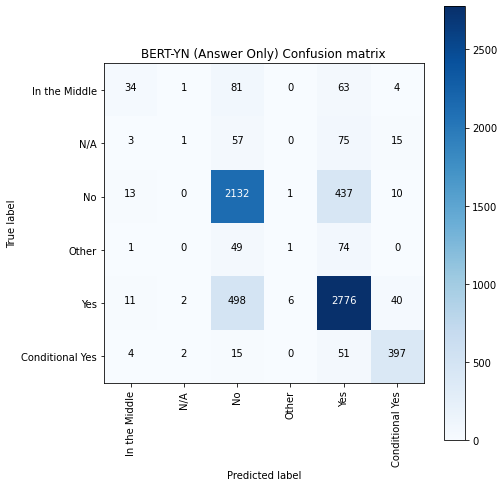

In [26]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt
# source: https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-YN (Answer Only) Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])

Error Analysis

In [27]:
pred_results['id'] = df_valid['id']
sub_results = pred_results
sub_results = sub_results.rename(columns={"goldstandard2": "BERT YN A only"})

results_df = pd.read_excel('/content/drive/MyDrive/DL Project/Results/ModelResults.xlsx')

results_df = results_df.drop(['Unnamed: 0'], axis = 1)
results_df['BERT YN A only'] = sub_results['BERT YN A only']

results_df.to_excel('/content/drive/MyDrive/DL Project/Results/ModelResults.xlsx')